In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('extraLargeAmountsOfData.csv')

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
data['KMeans_Labels'] = kmeans_labels

In [17]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-1.07765805e-01  9.95982198e-01 -4.07849502e-02 -9.80938017e-02
  -7.68394525e-02 -3.40083926e-02 -2.31760050e-01 -1.47191517e-02
  -8.65196169e-02  7.42776440e-01 -1.68641306e-01 -8.44170373e-02
  -8.82370775e-02 -1.37229143e-01 -1.06038478e-01  5.11689569e-01
  -2.88031110e-01 -2.35027861e-01 -4.73633638e-02  9.94817461e-01
  -7.66992839e-02 -4.88708723e-02 -1.69437442e-01 -1.33355377e-01
  -5.17831471e-01  5.10423297e-01 -4.58067274e-02  8.02244943e-03
  -9.42706019e-02  6.48202197e-01 -8.14067058e-02 -2.94478749e-02
  -6.54865009e-02 -2.72445085e-01 -1.80073286e-01 -5.51517447e-02
   5.15474134e-02 -7.37878452e-02 -1.55733696e-01 -5.17555414e-02
  -8.52802865e-02 -1.20177031e-02 -1.52058588e-01 -4.41957724e-02
  -3.89685512e-02 -3.40083926e-02 -4.62992333e-01 -3.98870259e-02
  -4.88708723e-02  1.83511154e+00  6.83347456e-02 -1.28505881e-01
  -2.48185406e-01 -1.61956766e-01  9.08402998e-01 -2.68222563e-01
  -3.60739553e-02 -9.30941513e-02 -1.47523513e-01  7.189185

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
data['DBSCAN_Labels'] = dbscan_labels

In [19]:
print("Number of clusters:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Number of noise points:", list(dbscan_labels).count(-1))

Number of clusters: 76
Number of noise points: 13373


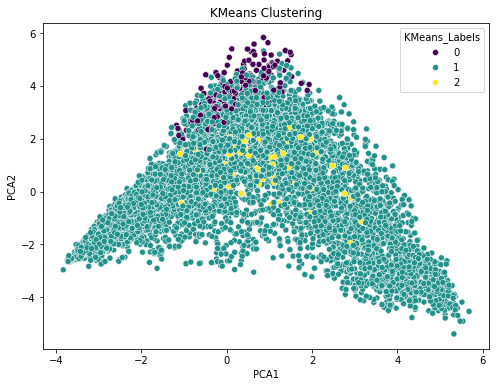

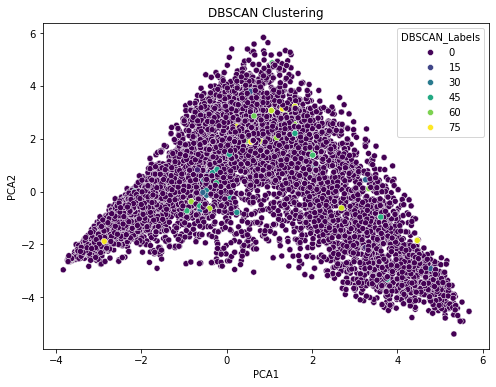

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=data, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Labels', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# KMeans silhouette score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print("KMeans Silhouette Score:", kmeans_silhouette)

# Filter out noise points (-1) from both data and labels
filtered_data = scaled_data[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Calculate silhouette score
dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

KMeans Silhouette Score: -0.03978750834421017
DBSCAN Silhouette Score: 0.9999999913966872


In [22]:
# KMeans SSE
kmeans_sse = kmeans.inertia_
print("KMeans SSE:", kmeans_sse)

# DBSCAN SSE
dbscan_sse = 0

# Get unique clusters (excluding noise points, i.e., label -1)
unique_labels = set(dbscan_labels) - {-1}

for label in unique_labels:
    # Get the points in the current cluster
    cluster_points = scaled_data[dbscan_labels == label]
    
    # Compute the centroid of the cluster
    centroid = cluster_points.mean(axis=0)
    
    # Compute the sum of squared distances for the current cluster
    sse_cluster = ((cluster_points - centroid) ** 2).sum()
    dbscan_sse += sse_cluster

print("DBSCAN SSE:", dbscan_sse)

KMeans SSE: 4126061.742411095
DBSCAN SSE: 8.552810380198743e-28
